# 5 モデルの評価と改良

In [67]:
# ライブラリインストール
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
import pandas as pd
import mglearn
from IPython.display import display
import joblib
import os
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split as split
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.simplefilter("ignore")

#　matplotlibでグラフ表示のマジックコマンド
%matplotlib inline

In [68]:
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression

# 合成データの生成
X, y = make_blobs(random_state=0)
# dataとLabelをtrainigデータとtestデータに分割
X_train, X_test, y_train, y_test = split(X, y, random_state=0)
# モデルのインスタンスを生成し、trainigデータで学習
logreg = LogisticRegression().fit(X_train, y_train)
# テストデータでモデルを評価
score = logreg.score(X_test, y_test)

# 評価スコアを表示
print(f'Test set Score: {score}')

Test set Score: 0.88


### 交差検証 - Cross-Validation -

In [69]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

iris = load_iris()
logreg = LogisticRegression()

scores = cross_val_score(logreg, iris.data, iris.target)
print(f'Cross-validation score: {scores}')

Cross-validation score: [0.96666667 1.         0.93333333 0.96666667 1.        ]


In [70]:
scores = cross_val_score(logreg, iris.data, iris.target, cv=5)
print(f'Cross-validation score: {scores}')

Cross-validation score: [0.96666667 1.         0.93333333 0.96666667 1.        ]


In [71]:
print('Average cross-validation score: {:.2f}'.format(scores.mean()))

Average cross-validation score: 0.97


In [72]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5)

In [73]:
print(f'Cross-varidation score:\n{cross_val_score(logreg, iris.data, iris.target, cv=kfold)}')

Cross-varidation score:
[1.         1.         0.86666667 0.93333333 0.83333333]


In [74]:
kfold = KFold(n_splits=3)
print(f'Cross-varidation score:\n{cross_val_score(logreg, iris.data, iris.target, cv=kfold)}')

Cross-varidation score:
[0. 0. 0.]


In [75]:
kfold = KFold(n_splits=3, shuffle=True, random_state=0)
print(f'Cross-varidation score:\n{cross_val_score(logreg, iris.data, iris.target, cv=kfold)}')

Cross-varidation score:
[0.98 0.96 0.96]


In [76]:
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
scores = cross_val_score(logreg, iris.data, iris.target, cv=loo)
print(f'Number of cv interactions: {len(scores)}')
print('Mean accuracy: {:.2f}'.format(scores.mean()))

Number of cv interactions: 150
Mean accuracy: 0.97


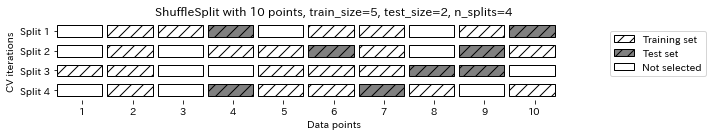

In [77]:
mglearn.plots.plot_shuffle_split()

In [78]:
from sklearn.model_selection import ShuffleSplit
shuffle_split = ShuffleSplit(test_size=.5, train_size=.5, n_splits=10)
scores = cross_val_score(logreg, iris.data, iris.target, cv=shuffle_split)
print(f'Cross-validation scores: \n{scores}')

Cross-validation scores: 
[0.92       0.90666667 0.96       0.93333333 0.98666667 0.98666667
 0.93333333 0.96       0.93333333 0.94666667]


In [79]:
from sklearn.model_selection import GroupKFold
# 合成データセットを生成
X, y = make_blobs(n_samples=12, random_state=0)
# 最初の3サンプルが同じグループに、次の4つが同じグループに
# というようにする
groups = [0, 0, 0, 1, 1, 1, 1, 2, 2, 3, 3, 3]
scores = cross_val_score(logreg, X, y, groups, cv=GroupKFold(n_splits=3))
print(f'Cross-validation score: {scores}')

Cross-validation score: [0.75       0.6        0.66666667]


In [81]:
mglearn.plots.plot_label_kfold()

AttributeError: module 'mglearn.plots' has no attribute 'plot_label_kfold'

### グリッドサーチ

In [82]:
from sklearn.svm import SVC
X_train, X_test, y_train, y_test = split(
    iris.data, iris.target, random_state=0)
print(f'Size of training set: {X_train.shape[0]}\nSize of test set: {X_test.shape[0]}')

best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # それぞれのパラメータの組み合わせに対してSVCを訓練
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        # SVCをテストデータで評価
        score = svm.score(X_test, y_test)
        # 良いスコアだったらスコアとパラメータを保存
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}
            
print('Best score: {:.2f}'.format(best_score))
print(f'Best parameters: {best_parameters}')

Size of training set: 112
Size of test set: 38
Best score: 0.97
Best parameters: {'C': 100, 'gamma': 0.001}


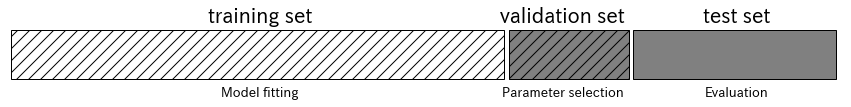

In [83]:
mglearn.plots.plot_threefold_split()

In [84]:
from sklearn.svm import SVC
# データをtrainigデータ+validデータとtestデータに分割する
X_trainval, X_test, y_trainval, y_test = split(
    iris.data, iris.target, random_state=0)
# trainigデータ+validデータをtrainigデータとtestデータに分割する
X_train, X_valid, y_train, y_valid = split(
    X_trainval, y_trainval, random_state=1)
print(f'Size of training set: {X_train.shape[0]} Size of validation set: {X_valid.shape[0]} Size of test set: {X_test.shape[0]}')

best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # それぞれのパラメータの組み合わせに対してSVCを訓練
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        # SVCをvalidデータで評価
        score = svm.score(X_valid, y_valid)
        # 良いスコアだったらスコアとパラメータを保存
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}
            
# trainingデータとvalidデータを用いてモデルの再構築し、
# testデータで評価
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)
test_score = svm.score(X_test, y_test)
print('Best score on validation set: {:.2f}'.format(best_score))
print(f'Best parameters: {best_parameters}')
print('Test set score with best parameters: {:.2f}'.format(test_score))

Size of training set: 84 Size of validation set: 28 Size of test set: 38
Best score on validation set: 0.96
Best parameters: {'C': 10, 'gamma': 0.001}
Test set score with best parameters: 0.92


In [85]:
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # それぞれのパラメータの組み合わせに対してSVCを訓練
        svm = SVC(gamma=gamma, C=C)
        # 交差検証を行う
        scores = cross_val_score(svm, X_trainval, y_trainval, cv=5)
        # 交差検証精度の平均値を計算する
        score = np.mean(scores)
        # 良いスコアだったらスコアとパラメータを保存
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}
# trainigデータとvalidデータを合わせて、モデルを再構築する
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

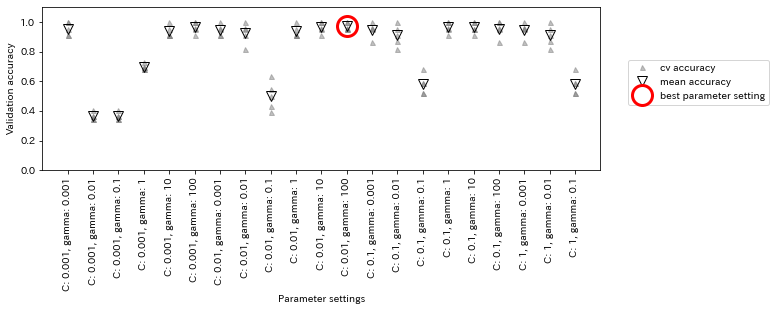

In [86]:
mglearn.plots.plot_cross_val_selection()

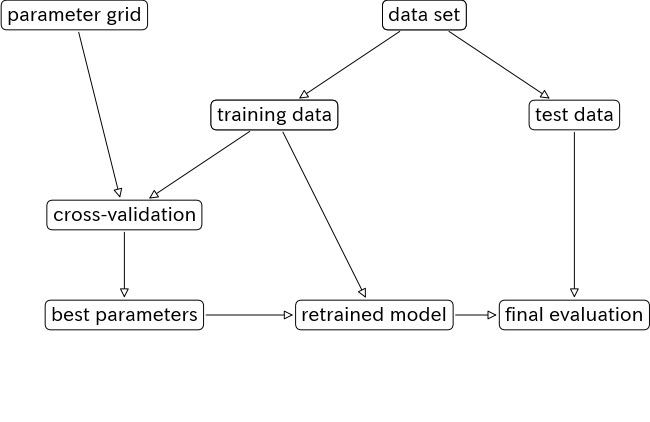

In [87]:
mglearn.plots.plot_grid_search_overview()

In [88]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
print(f'Parameter grid: \n{param_grid}')

Parameter grid: 
{'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}


In [89]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
grid_search = GridSearchCV(SVC(), param_grid, cv=5)

In [90]:
X_train, X_test, y_train, y_test = split(
    iris.data, iris.target, random_state=0)

In [91]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [92]:
print('Test set score: {:.2f}'.format(grid_search.score(X_test, y_test)))

Test set score: 0.97


In [93]:
print(f'Best parameters: {grid_search.best_params_}')
print('Best cross-validation score: {:.2f}'.format(grid_search.best_score_))

Best parameters: {'C': 10, 'gamma': 0.1}
Best cross-validation score: 0.97


In [94]:
print(f'Best estimater: {grid_search.best_estimator_}')

Best estimater: SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [95]:
results = pd.DataFrame(grid_search.cv_results_)
display(results.head())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001200,0.000979,0.001201,0.000980,0.001,0.001,"{'C': 0.001, 'gamma': 0.001}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22
1,0.001800,0.000747,0.001000,0.000894,0.001,0.01,"{'C': 0.001, 'gamma': 0.01}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22
2,0.000597,0.000488,0.000803,0.000402,0.001,0.1,"{'C': 0.001, 'gamma': 0.1}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22
3,0.000800,0.000400,0.000401,0.000491,0.001,1,"{'C': 0.001, 'gamma': 1}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22
4,0.000607,0.000495,0.000400,0.000490,0.001,10,"{'C': 0.001, 'gamma': 10}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22


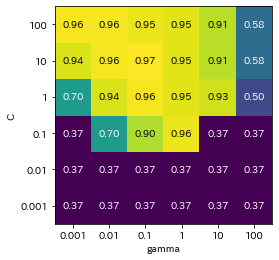

In [96]:
scores = np.array(results.mean_test_score).reshape(6, 6)

# 平均交差検証スコアのプロット
mglearn.tools.heatmap(scores, xlabel='gamma', xticklabels=param_grid['gamma'],
                      ylabel='C', yticklabels=param_grid['C'], cmap='viridis')
plt.show()

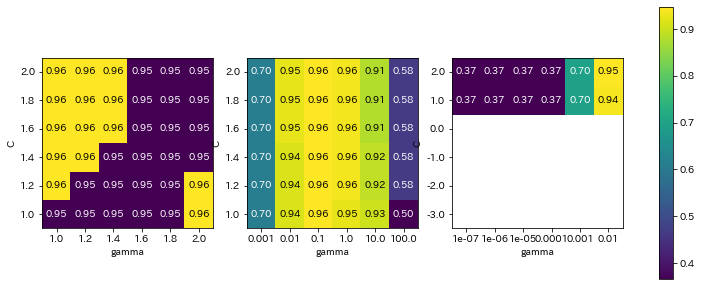

In [97]:
fig, axes = plt.subplots(1, 3, figsize=(13, 5))

param_grid_linear = {'C': np.linspace(1, 2, 6),
                     'gamma': np.linspace(1, 2, 6)}

param_grid_one_log = {'C': np.linspace(1, 2, 6),
                      'gamma': np.logspace(-3, 2, 6)}

param_grid_range = {'C': np.linspace(-3, 2, 6),
                    'gamma': np.logspace(-7, -2, 6)}

for param_grid, ax, in zip([param_grid_linear, param_grid_one_log,
                            param_grid_range], axes):
    grid_search = GridSearchCV(SVC(), param_grid, cv=5)
    grid_search.fit(X_train, y_train)
    scores = grid_search.cv_results_['mean_test_score'].reshape(6, 6)
    
    # 平均交差検証精度をプロット
    scores_image = mglearn.tools.heatmap(scores, xlabel='gamma', xticklabels=param_grid['gamma'],
                      ylabel='C', yticklabels=param_grid['C'], cmap='viridis', ax=ax)
plt.colorbar(scores_image, ax=axes.tolist())
plt.show()

In [98]:
param_grid = [{'kernel': ['rbf'],
               'C': [0.001, 0.01, 0.1, 1, 10, 100],
               'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
               {'kernel': ['linear'],
                'C': [0.001, 0.01, 0.1, 1, 10, 100]}]
print(f'List of grids:\n{param_grid}')

List of grids:
[{'kernel': ['rbf'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}, {'kernel': ['linear'], 'C': [0.001, 0.01, 0.1, 1, 10, 100]}]


In [99]:
grid_search = GridSearchCV(SVC(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print(f'Best parameters: {grid_search.best_params_}')
print('Best cross-validation score: {:.2f}'.format(grid_search.best_score_))

Best parameters: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Best cross-validation score: 0.97


In [100]:
results = pd.DataFrame(grid_search.cv_results_)
display(results.T)

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
mean_fit_time,0.00119681,0.00139885,0.00199175,0.00119839,0.000812626,0.000800467,0.000598383,0.000400448,0.000599909,0.000599909,...,0.000600052,0.00100002,0.000600004,0.000800467,0.000999451,0.00059967,0.00100007,0.000600004,0.000400066,0.000400066
std_fit_time,0.000397488,0.000802139,0.000905591,0.000400746,0.000406688,0.000749055,0.000488588,0.000490447,0.000489824,0.000489824,...,0.00048994,3.23407e-07,0.000489902,0.000400235,1.28834e-06,0.000489629,2.85943e-06,0.000489902,0.000489979,0.000489979
mean_score_time,0.000599861,0.000199509,0.000599623,0.000800371,0.000398111,0.000401545,0.000199842,0.000200605,0.000400114,0.000200081,...,0,0,0.000199986,0.000200081,0,0.000400162,0,0.000199842,0,0.000600338
std_score_time,0.000489786,0.000399017,0.000489592,0.000400189,0.000489069,0.000491797,0.000399685,0.000401211,0.000490038,0.000400162,...,0,0,0.000399971,0.000400162,0,0.000490096,0,0.000399685,0,0.000490175
param_C,0.001,0.001,0.001,0.001,0.001,0.001,0.01,0.01,0.01,0.01,...,100,100,100,100,0.001,0.01,0.1,1,10,100
param_gamma,0.001,0.01,0.1,1,10,100,0.001,0.01,0.1,1,...,0.1,1,10,100,NaN,NaN,NaN,NaN,NaN,NaN
param_kernel,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,...,rbf,rbf,rbf,rbf,linear,linear,linear,linear,linear,linear
params,"{'C': 0.001, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 1, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 10, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 100, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 1, 'kernel': 'rbf'}",...,"{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 100, 'gamma': 1, 'kernel': 'rbf'}","{'C': 100, 'gamma': 10, 'kernel': 'rbf'}","{'C': 100, 'gamma': 100, 'kernel': 'rbf'}","{'C': 0.001, 'kernel': 'linear'}","{'C': 0.01, 'kernel': 'linear'}","{'C': 0.1, 'kernel': 'linear'}","{'C': 1, 'kernel': 'linear'}","{'C': 10, 'kernel': 'linear'}","{'C': 100, 'kernel': 'linear'}"
split0_test_score,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,...,1,0.956522,0.869565,0.521739,0.347826,0.869565,1,1,1,0.956522
split1_test_score,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,...,0.956522,0.956522,0.913043,0.521739,0.347826,0.869565,0.913043,0.956522,1,0.956522


In [101]:
scores = cross_val_score(GridSearchCV(SVC(), param_grid, cv=5),
                         iris.data, iris.target, cv=5)
print(f'Cross-validation scores: {scores}')
print(f'Mean Cross-validation score: {scores.mean()}')

Cross-validation scores: [0.96666667 1.         0.9        0.96666667 1.        ]
Mean Cross-validation score: 0.9666666666666668


In [102]:
def nested_cv(X, y, inner_cv, outer_cv, Classifier, parameter_grid):
    outer_scores = []
    # 外側の交差検証による個々の分割に対するループ
    # (splitメソッドはインデックスを返す)
    for training_samples, test_samples in outer_cv.split(X, y):
        # 内側の交差検証を用いて最良のパラメータ設定を見つける
        best_params = {}
        best_score = -np.inf
        # 個々のパラメータ設定に対してループ
        for parameters in parameter_grid:
            # 内側の分割に対するスコアを格納
            cv_scores = []
            # 内側の交差検証のループ
            for inner_train, inner_test in inner_cv.split(
                X[training_samples], y[training_samples]):
                # 与えられたパラメータとtrainigデータで分類器を学習
                clf = Classifier(**parameters)
                clf.fit(X[inner_train], y[inner_train])
                # 内側のテストデータを評価
                score = clf.score(X[inner_test], y[inner_test])
                cv_scores.append(score)
            # 内部の分割に対するスコアの平均を算出
            mean_score = np.mean(cv_scores)
            if mean_score > best_score:
                # これまでのものよりも良ければ、パラメータを記憶しておく
                best_score = mean_score
                best_params = parameters
        # 最良のパラメータセットと外側のtrainigデータを用いて、クラス分類器を構築
        clf = Classifier(**best_params)
        clf.fit(X[training_samples], y[training_samples])
        # 評価する
        outer_scores.append(clf.score(X[test_samples], y[test_samples]))
    return np.array(outer_scores)

In [103]:
from sklearn.model_selection import ParameterGrid, StratifiedKFold
scores = nested_cv(iris.data, iris.target, StratifiedKFold(5),
                   StratifiedKFold(5), SVC, ParameterGrid(param_grid))
print(f'Cross-validation scores: {scores}')

Cross-validation scores: [0.96666667 1.         0.96666667 0.96666667 1.        ]


In [104]:
from sklearn.datasets import load_digits

digits = load_digits()
y = digits.target == 9

X_train, X_test, y_train, y_test = split(
    digits.data, y, random_state=0)

In [105]:
from sklearn.dummy import DummyClassifier
dummy_majority = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)
pred_most_frequent = dummy_majority.predict(X_test)
print(f'Unique predicted label: {np.unique(pred_most_frequent)}')
print('Test score: {:.2f}'.format(dummy_majority.score(X_test, y_test)))

Unique predicted label: [False]
Test score: 0.90


In [106]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)
pred_tree = tree.predict(X_test)
print('Test score: {:.2f}'.format(tree.score(X_test, y_test)))

Test score: 0.92


In [107]:
from sklearn.linear_model import LogisticRegression

dummy = DummyClassifier().fit(X_train, y_train)
pred_dummy = dummy.predict(X_test)
print('dummy score: {:.2f}'.format(dummy.score(X_test, y_test)))

logreg = LogisticRegression(C=0.1).fit(X_train, y_train)
pred_logreg = logreg.predict(X_test)
print('logreg score: {:.2f}'.format(logreg.score(X_test, y_test)))

dummy score: 0.82
logreg score: 0.98


In [108]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, pred_logreg)
print(f'Confusion matrix: \n{confusion}')

Confusion matrix: 
[[402   1]
 [  6  41]]


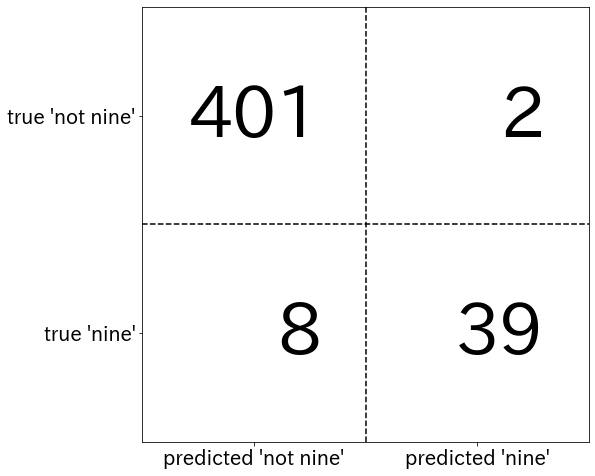

In [109]:
mglearn.plots.plot_confusion_matrix_illustration()

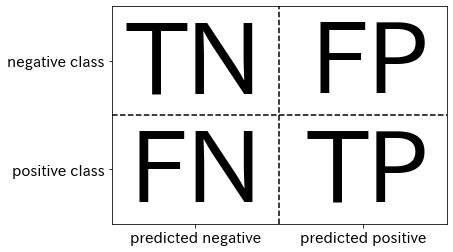

In [110]:
mglearn.plots.plot_binary_confusion_matrix()

In [111]:
print('Most frequent class:')
print(confusion_matrix(y_test, pred_most_frequent))
print('\nDummy model:')
print(confusion_matrix(y_test, pred_dummy))
print('\nDecision tree:')
print(confusion_matrix(y_test, pred_tree))
print('\nLogisticRegression:')
print(confusion_matrix(y_test, pred_logreg))

Most frequent class:
[[403   0]
 [ 47   0]]

Dummy model:
[[357  46]
 [ 42   5]]

Decision tree:
[[390  13]
 [ 24  23]]

LogisticRegression:
[[402   1]
 [  6  41]]


### 精度 - Accuracy -

$
Accuracy = \frac{TP + TN}{TP + TN + FP + FN}
$

正確な予測(TPとTN)をすべてのサンプルの個数(混合行列のすべてのエントリーを足した数)で割ったものである。

### 適合率 - Precision -

$
Precision = \frac{TP}{TP + FP}
$

Precisionは偽陽性 `FP` の数を制限したい場合に、<b>性能基準</b>として用いられる。

e.g. 新薬が臨床試験の結果有効であるかどうかを予測するモデルなど

### 再現率 - Recall -

$
Recall = \frac{TP}{TP + FN}
$

実際に陽性のサンプルのうち、<b>陽性と予測されたものの割合</b>と定義される。

すべての陽性サンプルを陽性だと判断する必要がある場合、つまり偽陰性を避けることが重要な場合に用いる。

e.g. 癌である人を全て見つけることが重要で、健康な人が癌であると予測されても構わない。

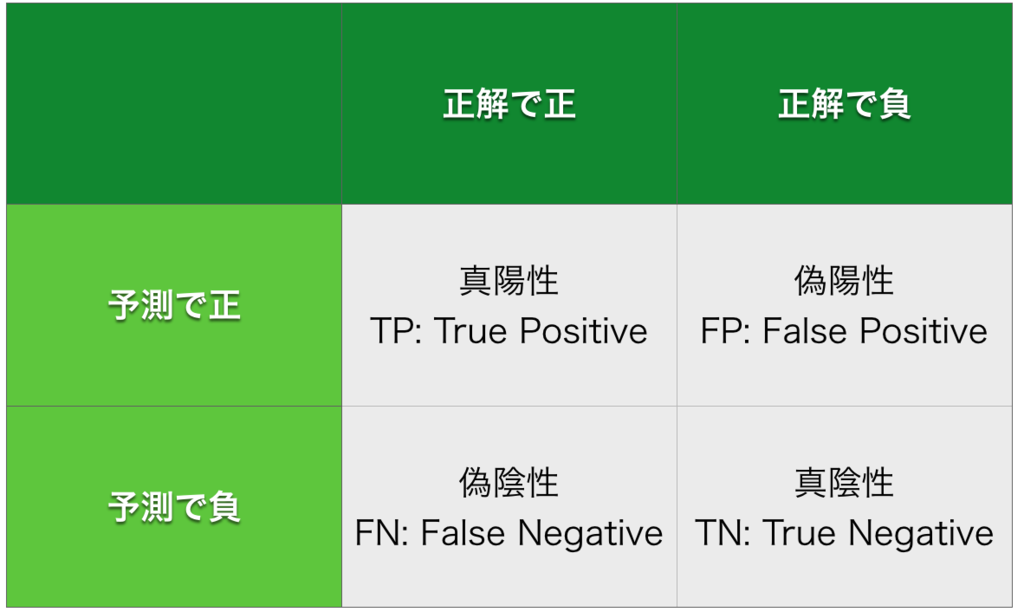

[いまさら聞けない機械学習の評価関数](https://data.gunosy.io/entry/2016/08/05/115345)

### F-値 / F-スコア - F-meature / F-Score -

$
F = 2\frac{Precision ・ Recall}{Precision + Recall}
$

適合率 `Precision` と再現率 `Recall` の調和平均で計算される

In [112]:
from sklearn.metrics import f1_score
print('f1 score most frequent: {:.2f}'.format(
        f1_score(y_test, pred_most_frequent)))
print('f1 score dummy: {:.2f}'.format(f1_score(y_test, pred_dummy)))
print('f1 score tree: {:.2f}'.format(f1_score(y_test, pred_tree)))
print('f1 score logistic regression: {:.2f}'.format(f1_score(y_test, pred_logreg)))

f1 score most frequent: 0.00
f1 score dummy: 0.10
f1 score tree: 0.55
f1 score logistic regression: 0.92


In [113]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_most_frequent,
                            target_names=['not nine', 'nine']))

              precision    recall  f1-score   support

    not nine       0.90      1.00      0.94       403
        nine       0.00      0.00      0.00        47

    accuracy                           0.90       450
   macro avg       0.45      0.50      0.47       450
weighted avg       0.80      0.90      0.85       450



In [114]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_dummy,
                            target_names=['not nine', 'nine']))

              precision    recall  f1-score   support

    not nine       0.89      0.89      0.89       403
        nine       0.10      0.11      0.10        47

    accuracy                           0.80       450
   macro avg       0.50      0.50      0.50       450
weighted avg       0.81      0.80      0.81       450



In [115]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_tree,
                            target_names=['not nine', 'nine']))

              precision    recall  f1-score   support

    not nine       0.94      0.97      0.95       403
        nine       0.64      0.49      0.55        47

    accuracy                           0.92       450
   macro avg       0.79      0.73      0.75       450
weighted avg       0.91      0.92      0.91       450



In [116]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_logreg,
                            target_names=['not nine', 'nine']))

              precision    recall  f1-score   support

    not nine       0.99      1.00      0.99       403
        nine       0.98      0.87      0.92        47

    accuracy                           0.98       450
   macro avg       0.98      0.93      0.96       450
weighted avg       0.98      0.98      0.98       450



In [117]:
from mglearn.datasets import make_blobs
X, y = make_blobs(n_samples=(400, 50), centers=2, cluster_std=[7.0, 2],
                  random_state=22)
X_train, X_test, y_train, y_test = split(X, y, random_state=0)
svc = SVC(gamma=.05).fit(X_train, y_train)

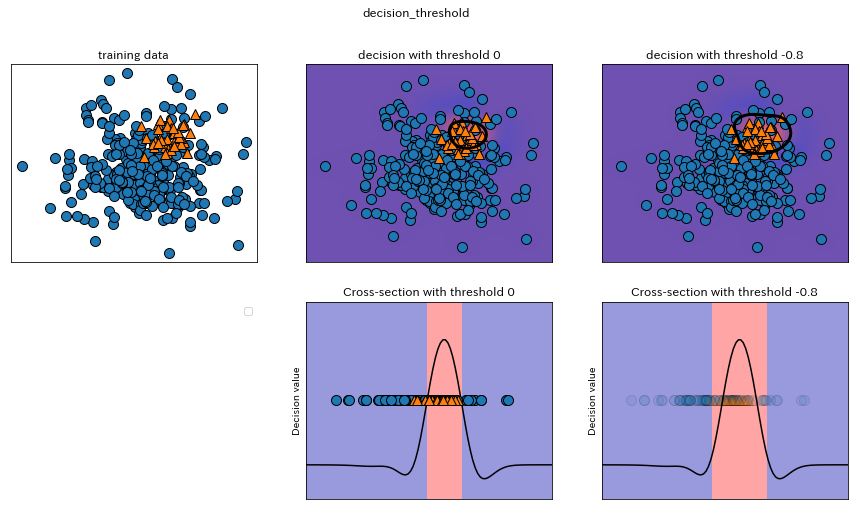

In [118]:
mglearn.plots.plot_decision_threshold()

In [119]:
print(classification_report(y_test, svc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.97      0.89      0.93       104
           1       0.35      0.67      0.46         9

    accuracy                           0.88       113
   macro avg       0.66      0.78      0.70       113
weighted avg       0.92      0.88      0.89       113



In [120]:
y_pred_lower_threshold = svc.decision_function(X_test) > -.8

In [121]:
print(classification_report(y_test, y_pred_lower_threshold))

              precision    recall  f1-score   support

           0       1.00      0.82      0.90       104
           1       0.32      1.00      0.49         9

    accuracy                           0.83       113
   macro avg       0.66      0.91      0.69       113
weighted avg       0.95      0.83      0.87       113



In [122]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(
    y_test, svc.decision_function(X_test))

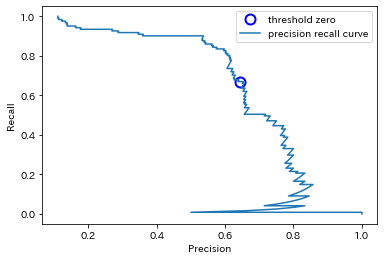

In [123]:
# カーブが滑らかになるようにデータポイントを増やす
X, y = make_blobs(n_samples=(4000, 500), centers=2, cluster_std=[7.0, 2],
                  random_state=22)
X_train, X_test, y_train, y_test = split(X, y, random_state=0)
svc = SVC(gamma=.05).fit(X_train, y_train)
precision, recall, thresholds = precision_recall_curve(
    y_test, svc.decision_function(X_test))
# ゼロに最も近いスレッショルドを探す
close_zero = np.argmin(np.abs(thresholds))
plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10,
         label='threshold zero', fillstyle='none', c='b', mew=2)

plt.plot(precision, recall, label='precision recall curve')
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.legend(loc='best')
plt.show()

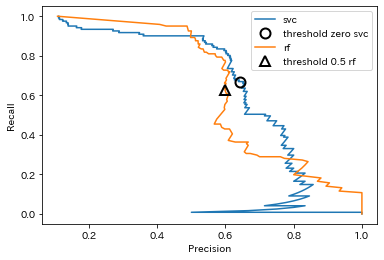

In [124]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=0, max_features=2)
rf.fit(X_train, y_train)

# RandomForestClassifierにはpredict_probaはあるがdecision_functionがない
precision_rf, recall_rf, thresholds_rf = precision_recall_curve(
    y_test, rf.predict_proba(X_test)[:, 1])

plt.plot(precision, recall, label='svc')

plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10,
         label='threshold zero svc', fillstyle='none', c='k', mew=2)

plt.plot(precision_rf, recall_rf, label='rf')

close_default_rf = np.argmin(np.abs(thresholds_rf - 0.5))
plt.plot(precision_rf[close_default_rf], recall_rf[close_default_rf], '^', c='k',
         markersize=10, label='threshold 0.5 rf', fillstyle='none', mew=2)
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.legend(loc='best')
plt.show()

In [125]:
print('f1_score of random forest: {:.3f}'.format(
        f1_score(y_test, rf.predict(X_test))))
print('f1_score of svc: {:.3f}'.format(f1_score(y_test, svc.predict(X_test))))

f1_score of random forest: 0.610
f1_score of svc: 0.656


In [127]:
from sklearn.metrics import average_precision_score
ap_rf = average_precision_score(y_test, rf.predict_proba(X_test)[:, 1])
ap_svc = average_precision_score(y_test, svc.decision_function(X_test))
print('Average precision of random forest: {:.3f}'.format(ap_rf))
print('Average precision of svc: {:.3f}'.format(ap_svc))

Average precision of random forest: 0.660
Average precision of svc: 0.666


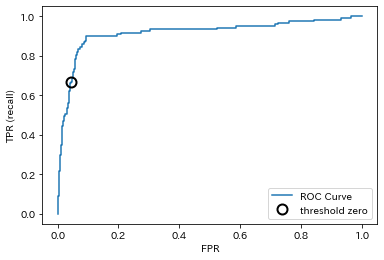

In [128]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, svc.decision_function(X_test))

plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('FPR')
plt.ylabel('TPR (recall)')
# 0に最も近いスレッショルドを見つける
close_zero = np.argmin(np.abs(thresholds))
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10,
         label='threshold zero', fillstyle='none', c='k', mew=2)
plt.legend(loc=4)
plt.show()

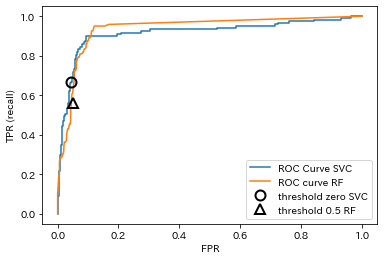

In [129]:
from sklearn.metrics import roc_curve
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, rf.predict_proba(X_test)[:, 1])

plt.plot(fpr, tpr, label='ROC Curve SVC')
plt.plot(fpr_rf, tpr_rf, label='ROC curve RF')

plt.xlabel('FPR')
plt.ylabel('TPR (recall)')
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10,
        label='threshold zero SVC', fillstyle='none', c='k', mew=2)
close_default_rf = np.argmin(np.abs(thresholds_rf - 0.5))
plt.plot(fpr_rf[close_default_rf], tpr[close_default_rf], '^', markersize=10,
         label='threshold 0.5 RF', fillstyle='none', c='k', mew=2)
plt.legend(loc=4)
plt.show()

In [131]:
from sklearn.metrics import roc_auc_score
rf_auc = roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])
svc_auc = roc_auc_score(y_test, svc.decision_function(X_test))
print('AUC for Random Forest: {:.3f}'.format(rf_auc))
print('AUC for SVC: {:.3f}'.format(svc_auc))

AUC for Random Forest: 0.937
AUC for SVC: 0.916


gamma = 1.00 accuracy = 0.896 AUC = 0.50
gamma = 0.05 accuracy = 0.896 AUC = 1.00
gamma = 0.01 accuracy = 0.896 AUC = 1.00


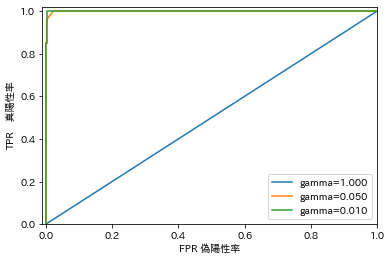

In [134]:
y = digits.target == 9

X_train, X_test, y_train, y_test = split(
    digits.data, y, random_state=0)

plt.figure()

for gamma in [1, 0.05, 0.01]:
    svc = SVC(gamma=gamma).fit(X_train, y_train)
    accuracy = svc.score(X_test, y_test)
    auc = roc_auc_score(y_test, svc.decision_function(X_test))
    fpr, tpr, _ = roc_curve(y_test, svc.decision_function(X_test))
    print('gamma = {:.2f} accuracy = {:.3f} AUC = {:.2f}'.format(
        gamma, accuracy, auc))
    plt.plot(fpr, tpr, label='gamma={:.3f}'.format(gamma))
plt.xlabel('FPR 偽陽性率')
plt.ylabel('TPR　真陽性率')
plt.xlim(-0.01, 1)
plt.ylim(0, 1.02)
plt.legend(loc='best')
plt.show()

In [136]:
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = split(
    digits.data, digits.target, random_state=0)
lr = LogisticRegression().fit(X_train, y_train)
pred = lr.predict(X_test)
print('Accuracy: {:.3f}'.format(accuracy_score(y_test, pred)))
print(f'Confusion matrix:\n{confusion_matrix(y_test, pred)}')

Accuracy: 0.951
Confusion matrix:
[[37  0  0  0  0  0  0  0  0  0]
 [ 0 40  0  0  0  0  0  0  2  1]
 [ 0  1 40  3  0  0  0  0  0  0]
 [ 0  0  0 43  0  0  0  0  1  1]
 [ 0  0  0  0 37  0  0  1  0  0]
 [ 0  0  0  0  0 46  0  0  0  2]
 [ 0  1  0  0  0  0 51  0  0  0]
 [ 0  0  0  1  1  0  0 46  0  0]
 [ 0  3  1  0  0  0  0  0 43  1]
 [ 0  0  0  0  0  1  0  0  1 45]]


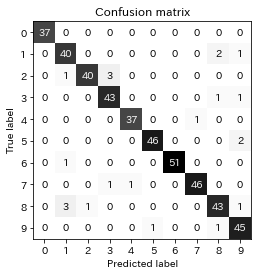

In [137]:
scores_image = mglearn.tools.heatmap(
    confusion_matrix(y_test, pred), xlabel='Predicted label',
    ylabel='True label', xticklabels=digits.target_names,
    yticklabels=digits.target_names, cmap=plt.cm.gray_r, fmt='%d')
plt.title('Confusion matrix')
plt.gca().invert_yaxis()
plt.show()

In [138]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.89      0.93      0.91        43
           2       0.98      0.91      0.94        44
           3       0.91      0.96      0.93        45
           4       0.97      0.97      0.97        38
           5       0.98      0.96      0.97        48
           6       1.00      0.98      0.99        52
           7       0.98      0.96      0.97        48
           8       0.91      0.90      0.91        48
           9       0.90      0.96      0.93        47

    accuracy                           0.95       450
   macro avg       0.95      0.95      0.95       450
weighted avg       0.95      0.95      0.95       450



In [139]:
print('Microaverage f1 score: {:.3f}'.format(
    f1_score(y_test, pred, average='micro')))
print('Macro average f1 score: {:.3f}'.format(
    f1_score(y_test, pred, average='macro')))

Microaverage f1 score: 0.951
Macro average f1 score: 0.952


In [142]:
print(f'Default scoring: {cross_val_score(SVC(), digits.data, digits.target == 9)}')

# scoring = "accuracy"としても結果は変わらない
explicit_accuracy = cross_val_score(SVC(), digits.data, digits.target == 9, scoring='accuracy')
print(f'Explicit accuracy scoring: {explicit_accuracy}')
roc_auc = cross_val_score(SVC(), digits.data, digits.target == 9, scoring='roc_auc')
print(f'AUC scoring: {roc_auc}')

Default scoring: [0.975      0.99166667 1.         0.99442897 0.98050139]
Explicit accuracy scoring: [0.975      0.99166667 1.         0.99442897 0.98050139]
AUC scoring: [0.99717078 0.99854252 1.         0.999828   0.98400413]


In [148]:
X_train, X_test, y_train, y_test = split(
    digits.data, digits.target == 9, random_state=0)

# 説明の都合上、あまりよくないグリッドを与える
param_grid = {'gamma': [0.0001, 0.01, 0.1, 1, 10]}

# デフォルトのスコア法である精度で評価
grid = GridSearchCV(SVC(), param_grid=param_grid)
grid.fit(X_train, y_train)

print('Grid-search with accuracy')
print(f'Best parameters: {grid.best_params_}')
print('Best cross-validation score (accuracy): {:.3f}'.format(grid.best_score_))
print('Test set AUC: {:.3f}'.format(
    roc_auc_score(y_test, grid.decision_function(X_test))))
print('Test set accuracy: {:.3f}'.format(grid.score(X_test, y_test)))

Grid-search with accuracy
Best parameters: {'gamma': 0.0001}
Best cross-validation score (accuracy): 0.976
Test set AUC: 0.992
Test set accuracy: 0.973


In [151]:
# AUCをスコアに用いる
grid = GridSearchCV(SVC(), param_grid=param_grid, scoring='roc_auc')
grid.fit(X_train, y_train)

print('\nGrid-Search with AUC')
print(f'Best parameters: {grid.best_params_}')
print('Best cross-validation score (AUC): {:.3f}'.format(grid.best_score_))
print('Test set AUC: {:.3f}'.format(
    roc_auc_score(y_test, grid.decision_function(X_test))))
print('Test set accuray: {:.3f}'.format(grid.score(X_test, y_test)))


Grid-Search with AUC
Best parameters: {'gamma': 0.01}
Best cross-validation score (AUC): 0.998
Test set AUC: 1.000
Test set accuray: 1.000


In [152]:
from sklearn.metrics import SCORERS
print(f'Available scores:\n{sorted(SCORERS.keys())}')

Available scores:
['accuracy', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'average_precision', 'balanced_accuracy', 'completeness_score', 'explained_variance', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'fowlkes_mallows_score', 'homogeneity_score', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted', 'max_error', 'mutual_info_score', 'neg_brier_score', 'neg_log_loss', 'neg_mean_absolute_error', 'neg_mean_gamma_deviance', 'neg_mean_poisson_deviance', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_median_absolute_error', 'neg_root_mean_squared_error', 'normalized_mutual_info_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'r2', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'roc_auc', 'roc_auc_ovo', 'roc_auc_ovo_weighted', 'roc_auc_ovr', 'roc_auc_ovr_weighted', 'v_measure_score']
